In [1]:
from qutip import *
from scipy import *
from random import *

import numpy as np
import matplotlib.pyplot as plt

vec_eigen = []

N = 9
M=512
# vertex numbr
V = 3
# colour number
C = 3

#edges matrix
E = [[1,1,1],[1,1,1],[1,1,1]]
E = np.array(E)


h  = 1.0 *np.ones(V) #1.0 * 2 * pi * (1 - 2 * np.ones(N))
Jz = 2 * np.ones(N) #abs(1.0 * 2 * pi * (1 - 2 * rand(N)))
Jx = 1.0 * 2 * pi * (1 - 2 * rand(N))

# Jy = 1.0 * 2 * pi * (1 - 2 * rand(N))

taumax = 100.0
taulist = np.linspace(0, taumax, 2000)

si = qeye(2)
sx = sigmax()
sz = sigmaz()
# sy = sigmay()

si_list = []
sx_list = []
sz_list = []
# sy_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)
        

    op_list[n] = sx
    sx_list.append(tensor(op_list))
    
    op_list[n] = sz
    sz_list.append(tensor(op_list))
    
    op_list[n] = si
    si_list.append(tensor(op_list))
    
#     op_list[n] = sy
#     sy_list.append(tensor(op_list))

# basis(0) for |-1| spin down 1 for |+1| spin up

# x(0) for sz |-1| spin down x(1) for sz |+1| spin up
# x = (sz+1)/2   sz=(-1) => x=0 sz=(+1) => x=1

psi_list = [basis(2,1),basis(2,0),basis(2,0),basis(2,0),basis(2,0),basis(2,1),basis(2,0),basis(2,1),basis(2,0)]
# for n in range(N):
#     psi_list.append(basis(2,randrange(1)))
# psi_list = [basis(2,0) for n in range(N)]
psi0 = tensor(psi_list)
#H0 transverse term
H0 = 0    
for n in range(N):
    H0 +=  1 * sx_list[n]
    
    
#Hp problem term
Hp = 0   
vertex_sum = 0
for v in range(V):
    
    same_colour_sum = 0
    diff_colour_sum = 0
    for c in range(C):
        same_colour_sum += sz_list[c+v*C]
        for c1 in range(C):
            diff_colour_sum += sz_list[c+v*C] * sz_list[c1+v*C]
    vertex_sum += sz_list[0] - 2 * same_colour_sum + diff_colour_sum
Hp += 2.0 - uniform(0,1) * vertex_sum
# for n in range(N):
#     Hp += h[n] * sz_list[n]



In [2]:
vertex_sum

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[12.  0.  0. ...  0.  0.  0.]
 [ 0.  8.  0. ...  0.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 30.  0.  0.]
 [ 0.  0.  0. ...  0. 30.  0.]
 [ 0.  0.  0. ...  0.  0. 42.]]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[12.  0.  0. ...  0.  0.  0.]
 [ 0.  8.  0. ...  0.  0.  0.]
 [ 0.  0.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 30.  0.  0.]
 [ 0.  0.  0. ...  0. 30.  0.]
 [ 0.  0.  0. ...  0.  0. 42.]]

In [3]:
Hp

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[ -5.57929326   0.           0.         ...   0.           0.
    0.        ]
 [  0.          -3.05286218   0.         ...   0.           0.
    0.        ]
 [  0.           0.          -3.05286218 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -16.94823316   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -16.94823316
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -24.52752643]]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[ -5.57929326   0.           0.         ...   0.           0.
    0.        ]
 [  0.          -3.05286218   0.         ...   0.           0.
    0.        ]
 [  0.           0.          -3.05286218 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -16.94823316   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -16.94823316
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -24.52752643]]

In [4]:

colour_sum = 0
for c in range(C):
    # interaction terms
    
    for v in range(V):
        for v1 in range(v+1,V):
            colour_sum += np.triu(E)[v][v1] * sz_list[c+v*C] * sz_list[c+v1*C]
Hp += 1 * colour_sum
#     Hp += Jz[n] * sz_list[n] * sz_list[(n+1)]
#     H1 += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]

In [5]:
Hp

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[  3.42070674   0.           0.         ...   0.           0.
    0.        ]
 [  0.           1.94713782   0.         ...   0.           0.
    0.        ]
 [  0.           0.           1.94713782 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -11.94823316   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -11.94823316
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -15.52752643]]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[  3.42070674   0.           0.         ...   0.           0.
    0.        ]
 [  0.           1.94713782   0.         ...   0.           0.
    0.        ]
 [  0.           0.           1.94713782 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -11.94823316   0.
    0.        ]
 [  0.           0.           0.         ...   0.         -11.94823316
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  -15.52752643]]

In [6]:


# the time-dependent hamiltonian in list-function format
args = {'t_max': max(taulist)}

h_t = [[H0, lambda t, args : (args['t_max']-t)/args['t_max']],
       [Hp, lambda t, args : t/args['t_max']]]

evals_mat = np.zeros((len(taulist),M))
ekets_mat = np.zeros((len(taulist),M),dtype = object)
P_mat = np.zeros((len(taulist),M))

idx = [0]
def process_rho(tau, psi):
  
    # evaluate the Hamiltonian with gradually switched on interaction 
    H = Qobj.evaluate(h_t, tau, args)

    # find the M lowest eigenvalues of the system
    evals, ekets = H.eigenstates(eigvals=M)
#     print(ekets[0].shape)

    evals_mat[idx[0],:] = real(evals)
    ekets_mat[idx[0],:] = ekets
    
    # find the overlap between the eigenstates and psi 
#     for n, eket in enumerate(ekets):
#         P_mat[idx[0],n] = abs(eket.overlap(psi))**2
#         P_mat[idx[0],n] = abs((eket.dag().data * psi.data)[0,0])**2
        
    idx[0] += 1
    
sesolve(h_t, psi0, taulist, process_rho, args, options=Options(nsteps=100000), _safe_mode=True)

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0

In [7]:
P_mat.size

1024000

1024000

In [8]:
evals_mat[len(taulist)-1]

array([-23.73787979, -19.94823316, -19.94823316, -17.21144871,
       -17.21144871, -16.15858653, -16.15858653, -16.15858653,
       -16.15858653, -16.15858653, -16.15858653, -16.15858653,
       -16.15858653, -16.15858653, -16.15858653, -15.73787979,
       -15.52752643, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.42180207, -13.42180207, -13.42180207,
       -13.42180207, -13.42180207, -13.42180207, -13.42180207,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.3689399 ,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.3689399 ,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.15858653,
       -12.15858653, -12.15858653, -12.15858653, -11.94823316,
       -11.94823316, -11.94823316, -11.94823316, -11.94823316,
       -11.94823316, -11.94823316, -11.94823316, -11.10

array([-23.73787979, -19.94823316, -19.94823316, -17.21144871,
       -17.21144871, -16.15858653, -16.15858653, -16.15858653,
       -16.15858653, -16.15858653, -16.15858653, -16.15858653,
       -16.15858653, -16.15858653, -16.15858653, -15.73787979,
       -15.52752643, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.63215544, -13.63215544, -13.63215544,
       -13.63215544, -13.42180207, -13.42180207, -13.42180207,
       -13.42180207, -13.42180207, -13.42180207, -13.42180207,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.3689399 ,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.3689399 ,
       -12.3689399 , -12.3689399 , -12.3689399 , -12.15858653,
       -12.15858653, -12.15858653, -12.15858653, -11.94823316,
       -11.94823316, -11.94823316, -11.94823316, -11.94823316,
       -11.94823316, -11.94823316, -11.94823316, -11.10

In [9]:
len(ekets_mat)

2000

2000

In [10]:
for time in range(len(taulist)):
    print(evals_mat[time][7])




-7.0
-6.998211797144764
-6.99642772793154
-6.994647797603136
-6.992872011415231
-6.991100374636451
-6.989332892548464
-6.987569570445955
-6.9858104136367585
-6.984055427441814
-6.982304617195365
-6.980557988244887
-6.978815545951182
-6.977077295688506
-6.9753432428445015
-6.973613392820334
-6.971887751030748
-6.970166322904103
-6.968449113882395
-6.966736129421391
-6.965027374990607
-6.96332285607344
-6.961622578167169
-6.959926546783012
-6.958234767446221
-6.956547245696134
-6.954863987086166
-6.953184997183942
-6.951510281571312
-6.949839845844465
-6.948173695613884
-6.946511836504511
-6.9448542741557455
-6.943201014221472
-6.941552062370211
-6.939907424285094
-6.938267105663948
-6.936631112219374
-6.93499944967876
-6.933372123784386
-6.931749140293449
-6.930130504978126
-6.928516223625638
-6.926906302038318
-6.925300746033645
-6.923699561444312
-6.922102754118324
-6.920510329918949
-6.918922294724892
-6.917338654430296
-6.9157594149448185
-6.914184582193664
-6.912614162117669
-6.911

-6.706549272814686
-6.705911361094609
-6.705279295655276
-6.704653086450202
-6.704032743461893
-6.703418276701976
-6.702809696211335
-6.702207012060198
-6.701610234348339
-6.701019373205129
-6.700434438789707
-6.699855441291112
-6.6992823909284205
-6.698715297950858
-6.698154172637974
-6.697599025299762
-6.697049866276805
-6.696506705940444
-6.695969554692888
-6.695438422967371
-6.694913321228374
-6.694394259971673
-6.69388124972457
-6.693374301046039
-6.692873424526893
-6.692378630789944
-6.691889930490159
-6.691407334314857
-6.6909308529839056
-6.690460497249825
-6.689996277898056
-6.689538205747089
-6.68908629164869
-6.688640546488075
-6.688200981184097
-6.68776760668948
-6.687340433990997
-6.686919474109715
-6.68650473810114
-6.686096237055513
-6.685693982097986
-6.685297984388865
-6.68490825512386
-6.684524805534282
-6.684147646887297
-6.6837767904862275
-6.68341224767073
-6.683054029817102
-6.682702148338539
-6.682356614685399
-6.682017440345479
-6.681684636844313
-6.681358215745

-6.781024653583559
-6.782300633486699
-6.7835856809348645
-6.784879810738861
-6.786183037734615
-6.787495376782866
-6.788816842768744
-6.790147450601509
-6.791487215214069
-6.792836151562662
-6.794194274626479
-6.795561599407186
-6.7969381409285585
-6.798323914236041
-6.799718934396294
-6.801123216496745
-6.802536775645134
-6.803959626969
-6.805391785615232
-6.806833266749529
-6.808284085555912
-6.809744257236143
-6.811213797009263
-6.812692720110971
-6.814181041793048
-6.815678777322845
-6.817185941982598
-6.8187025510688875
-6.820228619891947
-6.821764163775087
-6.823309198054036
-6.824863738076199
-6.826427799200064
-6.82800139679449
-6.829584546237945
-6.831177262917826
-6.832779562229709
-6.834391459576614
-6.83601297036818
-6.837644110019929
-6.839284893952482
-6.8409353375906425
-6.842595456362708
-6.844265265699518
-6.845944781033602
-6.84763401779839
-6.849332991427207
-6.851041717352421
-6.852760211004501
-6.854488487811096
-6.856226563196072
-6.8579744525785085
-6.8597321713

-7.372801999119667
-7.376708154068804
-7.380621121449592
-7.384540908842841
-7.3884675235890365
-7.392400972792074
-7.396341263322873
-7.400288401822963
-7.404242394707905
-7.408203248170703
-7.412170968185111
-7.416145560508833
-7.420127030686686
-7.424115384053689
-7.428110625738048
-7.432112760664086
-7.436121793555106
-7.440137728936197
-7.444160571136949
-7.448190324294119
-7.452226992354234
-7.456270579076117
-7.4603210880334085
-7.464378522616901
-7.468442886037007
-7.472514181326018
-7.4765924113403255
-7.480677578762681
-7.4847696861043245
-7.488868735707089
-7.492974729745428
-7.497087670228475
-7.501207559001958
-7.505334397750128
-7.509468187997634
-7.513608931111356
-7.517756628302188
-7.521911280626791
-7.526072888989305
-7.530241454143002
-7.534416976691955
-7.538599457092628
-7.542788895655423
-7.546985292546241
-7.551188647787953
-7.555398961261904
-7.559616232709324
-7.563840461732747
-7.568071647797405
-7.572309790232543
-7.5765548882327955
-7.580806940859432
-7.5850

-8.804479807651807
-8.810201650997088
-8.815928272175741
-8.821659665127955
-8.8273958240836
-8.833136743577443
-8.838882418465351
-8.844632843941556
-8.850388015557074
-8.856147929239333
-8.861912581313048
-8.867681968522694
-8.873456088056363
-8.879234937571344
-8.885018515221525
-8.890806819686695
-8.896599850204066
-8.90239760660193
-8.908200089335992
-8.914007299528244
-8.91981923900887
-8.92563591036135
-8.93145731697103
-8.937283463077414
-8.943114353830754
-8.948949995353008
-8.954790394803783
-8.96063556045168
-8.966485501751501
-8.972340229427894
-8.978199755566147
-8.984064093710584
-8.989933258971623
-8.995807268141993
-9.00168613982335
-9.007569894564044
-9.01345855500937
-9.019352146065367
-9.025250695077757
-9.031154232027324
-9.037062789743635
-9.042976404138864
-9.048895114463821
-9.054818963588485
-9.060747998309612
-9.066682269688197
-9.072621833419763
-9.078566750241098
-9.08451708637691
-9.090472914030599
-9.096434311923424
-9.10240136588692
-9.1083741695135
-9.114

-10.429314901871042
-10.436343484249997
-10.443373920345637
-10.45040620888944
-10.457440348623797
-10.464476338301798
-10.47151417668695
-10.478553862553023
-10.4855953946837
-10.492638771872475
-10.499683992922348
-10.506731056645625
-10.513779961863776
-10.52083070740708
-10.527883292114547
-10.534937714833651
-10.541993974420146
-10.549052069737924
-10.556111999658741
-10.563173763062032
-10.570237358834808
-10.577302785871405
-10.584370043073339
-10.591439129349121
-10.598510043614077
-10.605582784790187
-10.612657351805934
-10.619733743596088
-10.626811959101675
-10.633891997269615
-10.640973857052792
-10.64805753740971
-10.655143037304523
-10.662230355706724
-10.669319491591091
-10.676410443937568
-10.683503211731054
-10.690597793961313
-10.697694189622835
-10.70479239771468
-10.711892417240412
-10.718994247207899
-10.726097886629226
-10.733203334520566
-10.740310589902027
-10.747419651797667
-10.754530519235184
-10.761643191245879
-10.768757666864662
-10.77587394512977
-10.7829

-12.79791077412008
-12.805486651349483
-12.813064032166766
-12.820642915198238
-12.828223299068325
-12.835805182399552
-12.843388563812542
-12.8509734419261
-12.858559815357104
-12.866147682720635
-12.87373704262992
-12.881327893696367
-12.888920234529515
-12.896514063737134
-12.904109379925178
-12.911706181697872
-12.919304467657572
-12.92690423640493
-12.934505486538752
-12.942108216656242
-12.949712425352718
-12.957318111221879
-12.964925272855687
-12.972533908844353
-12.980144017776398
-12.987755598238694
-12.995368648816436
-13.002983168093154
-13.010599154650697
-13.018216607069316
-13.025835523927585
-13.03345590380251
-13.041077745269469
-13.04870104690215
-13.056325807272856
-13.063952024952103
-13.07157969850895
-13.079208826510932
-13.086839407523973
-13.09447144011244
-13.102104922839276
-13.109739854265843
-13.117376232952008
-13.125014057456179
-13.13265332633524
-13.140294038144683
-13.147936191438482
-13.155579784769179
-13.163224816687872
-13.170871285744289
-13.178519

-12.79791077412008
-12.805486651349483
-12.813064032166766
-12.820642915198238
-12.828223299068325
-12.835805182399552
-12.843388563812542
-12.8509734419261
-12.858559815357104
-12.866147682720635
-12.87373704262992
-12.881327893696367
-12.888920234529515
-12.896514063737134
-12.904109379925178
-12.911706181697872
-12.919304467657572
-12.92690423640493
-12.934505486538752
-12.942108216656242
-12.949712425352718
-12.957318111221879
-12.964925272855687
-12.972533908844353
-12.980144017776398
-12.987755598238694
-12.995368648816436
-13.002983168093154
-13.010599154650697
-13.018216607069316
-13.025835523927585
-13.03345590380251
-13.041077745269469
-13.04870104690215
-13.056325807272856
-13.063952024952103
-13.07157969850895
-13.079208826510932
-13.086839407523973
-13.09447144011244
-13.102104922839276
-13.109739854265843
-13.117376232952008
-13.125014057456179
-13.13265332633524
-13.140294038144683
-13.147936191438482
-13.155579784769179
-13.163224816687872
-13.170871285744289
-13.178519

In [11]:

for n in range(len(P_mat[0,:])):
    lw = 0.5 + 4*P_mat[len(taulist)-2,n]    
    if lw > 0.55:
        if evals_mat[len(taulist)-1,n] == -3.0:
            print(array([evals_mat[len(taulist)-2,n], evals_mat[len(taulist)-1,n]]))
            print(n)

In [12]:
spin = 0
for num in range(9):
    spin = ekets_mat[len(taulist)-1][0].ptrace(num)
    if spin == basis(2,0).proj():
        print(0, end = '')
    elif spin == basis(2,1).proj():
        print(1, end = '')
    

000111111000111111

Text(0.5, 1.0, 'Energyspectrum (512 lowest values) of a chain of 9 spins.\n The occupation probabilities are encoded in the red line widths.')

Text(0.5, 1.0, 'Energyspectrum (512 lowest values) of a chain of 9 spins.\n The occupation probabilities are encoded in the red line widths.')

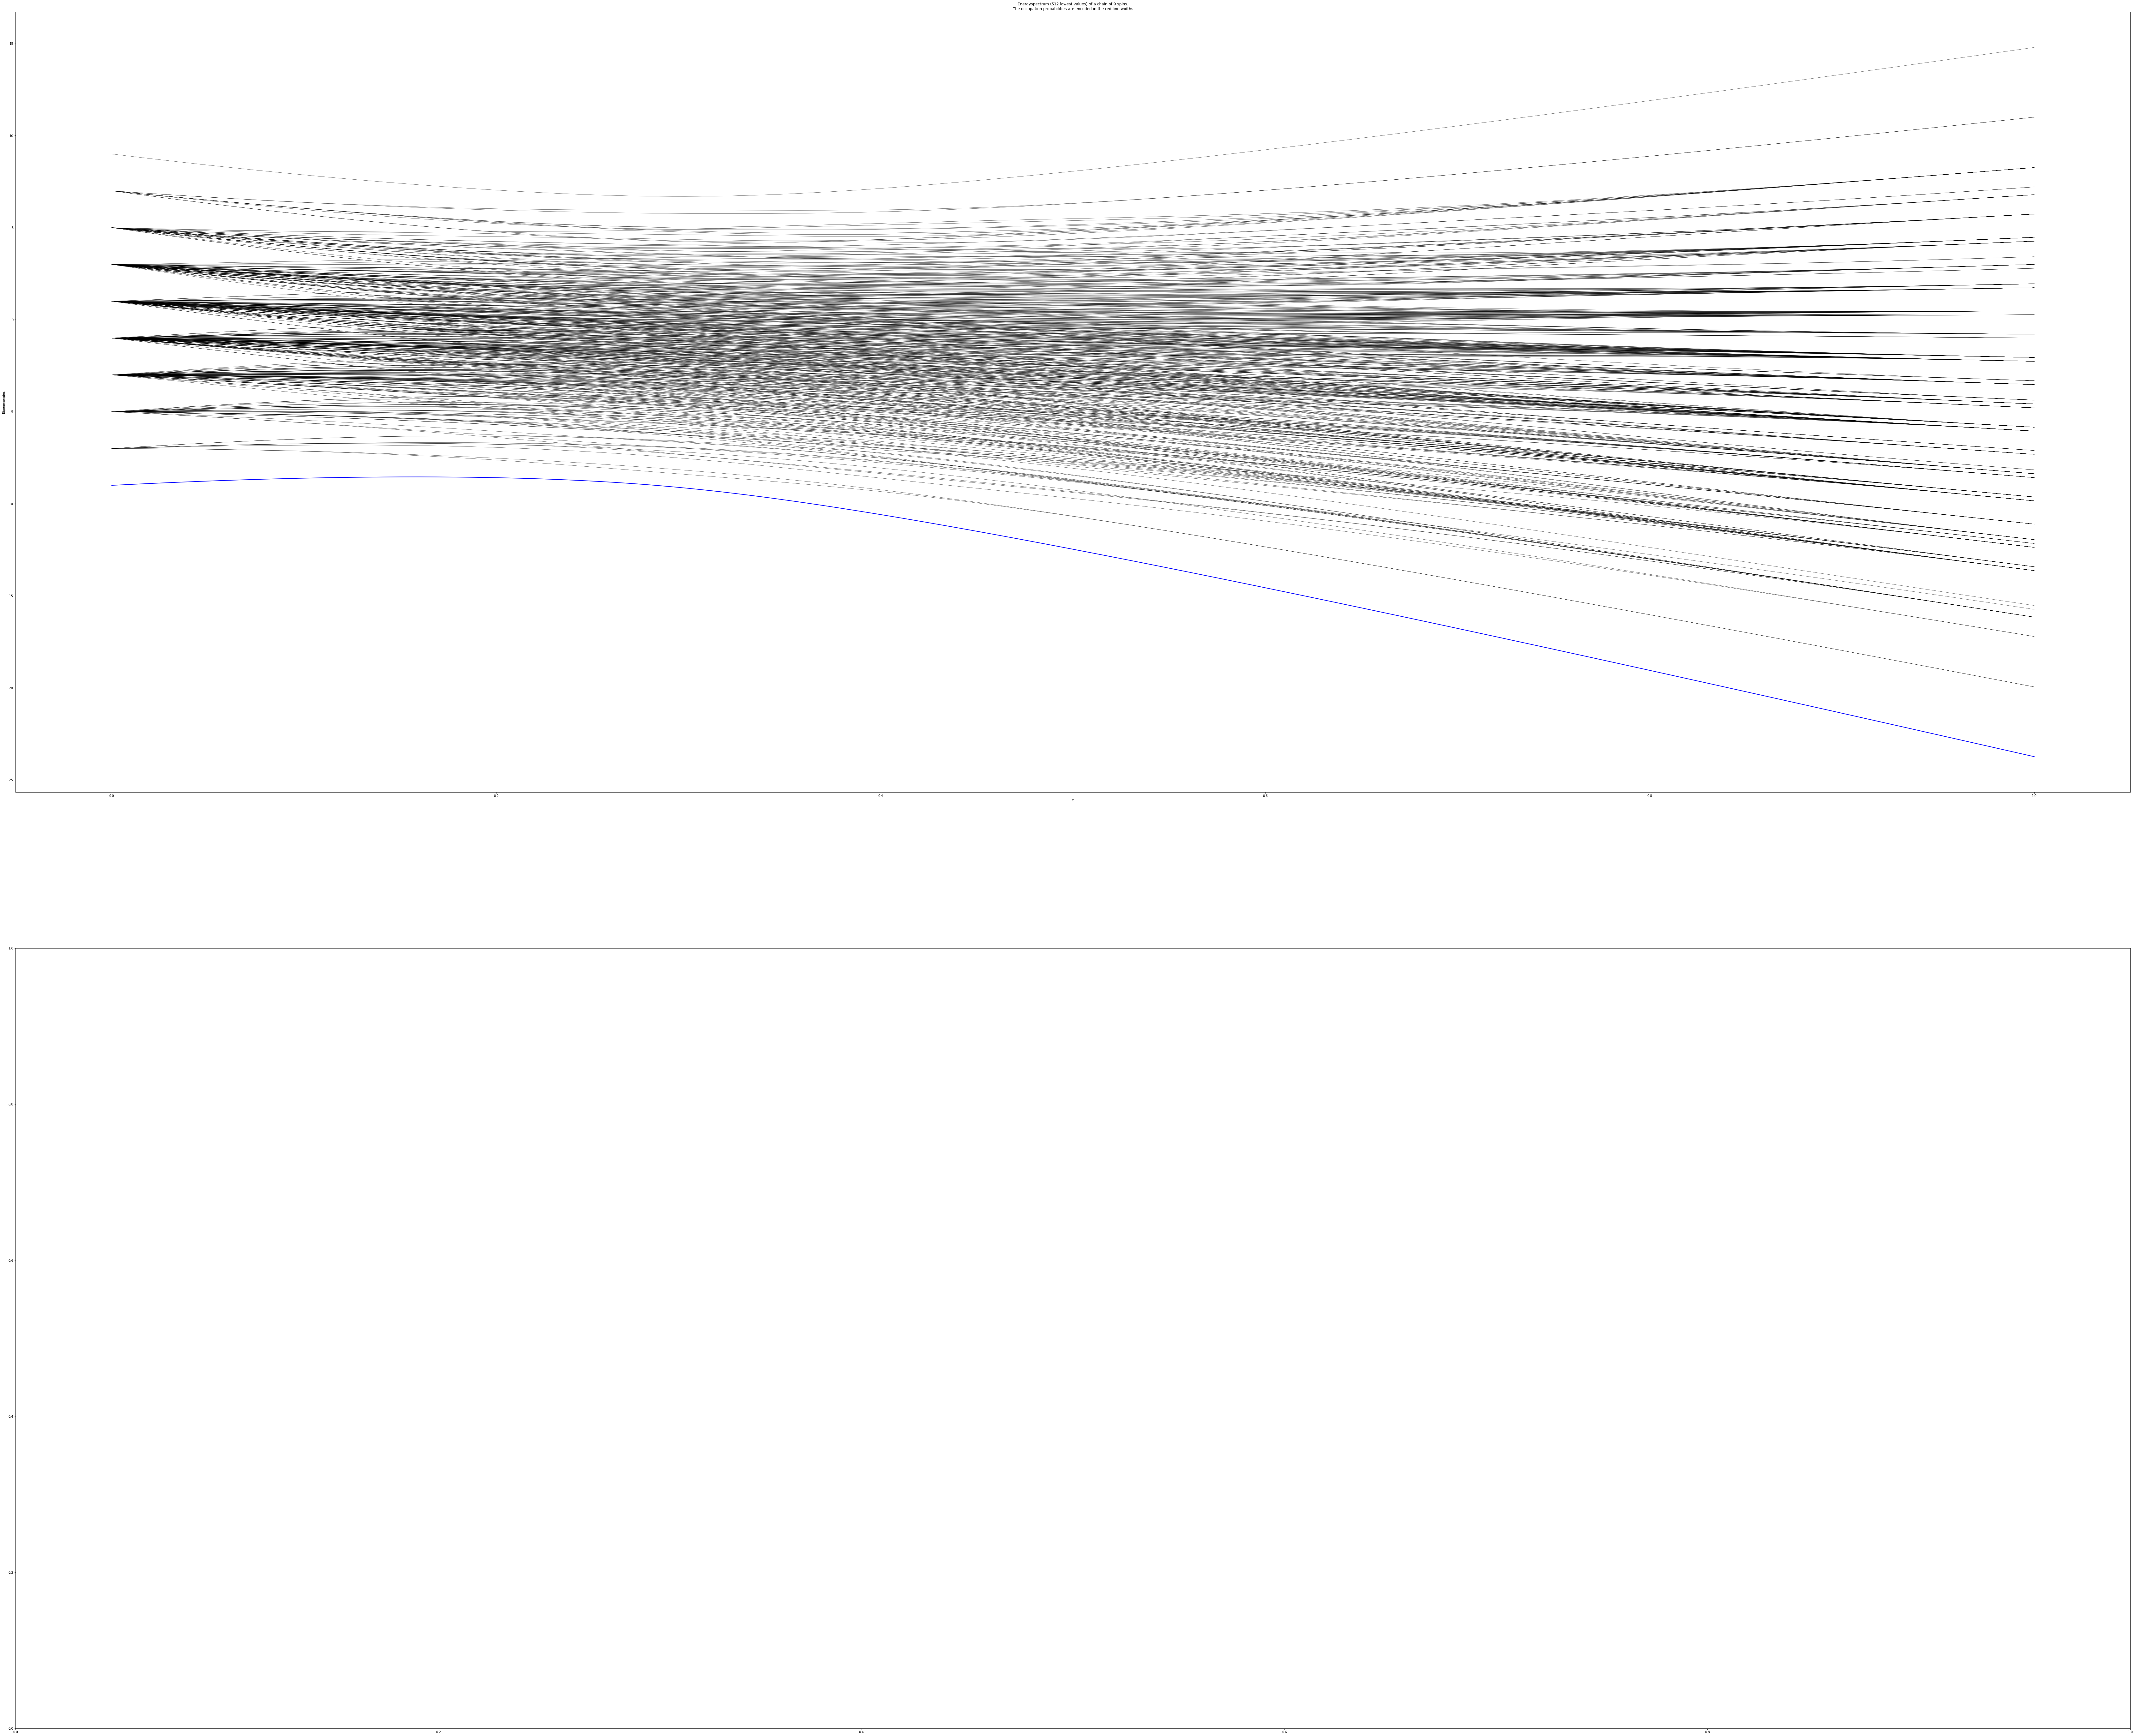

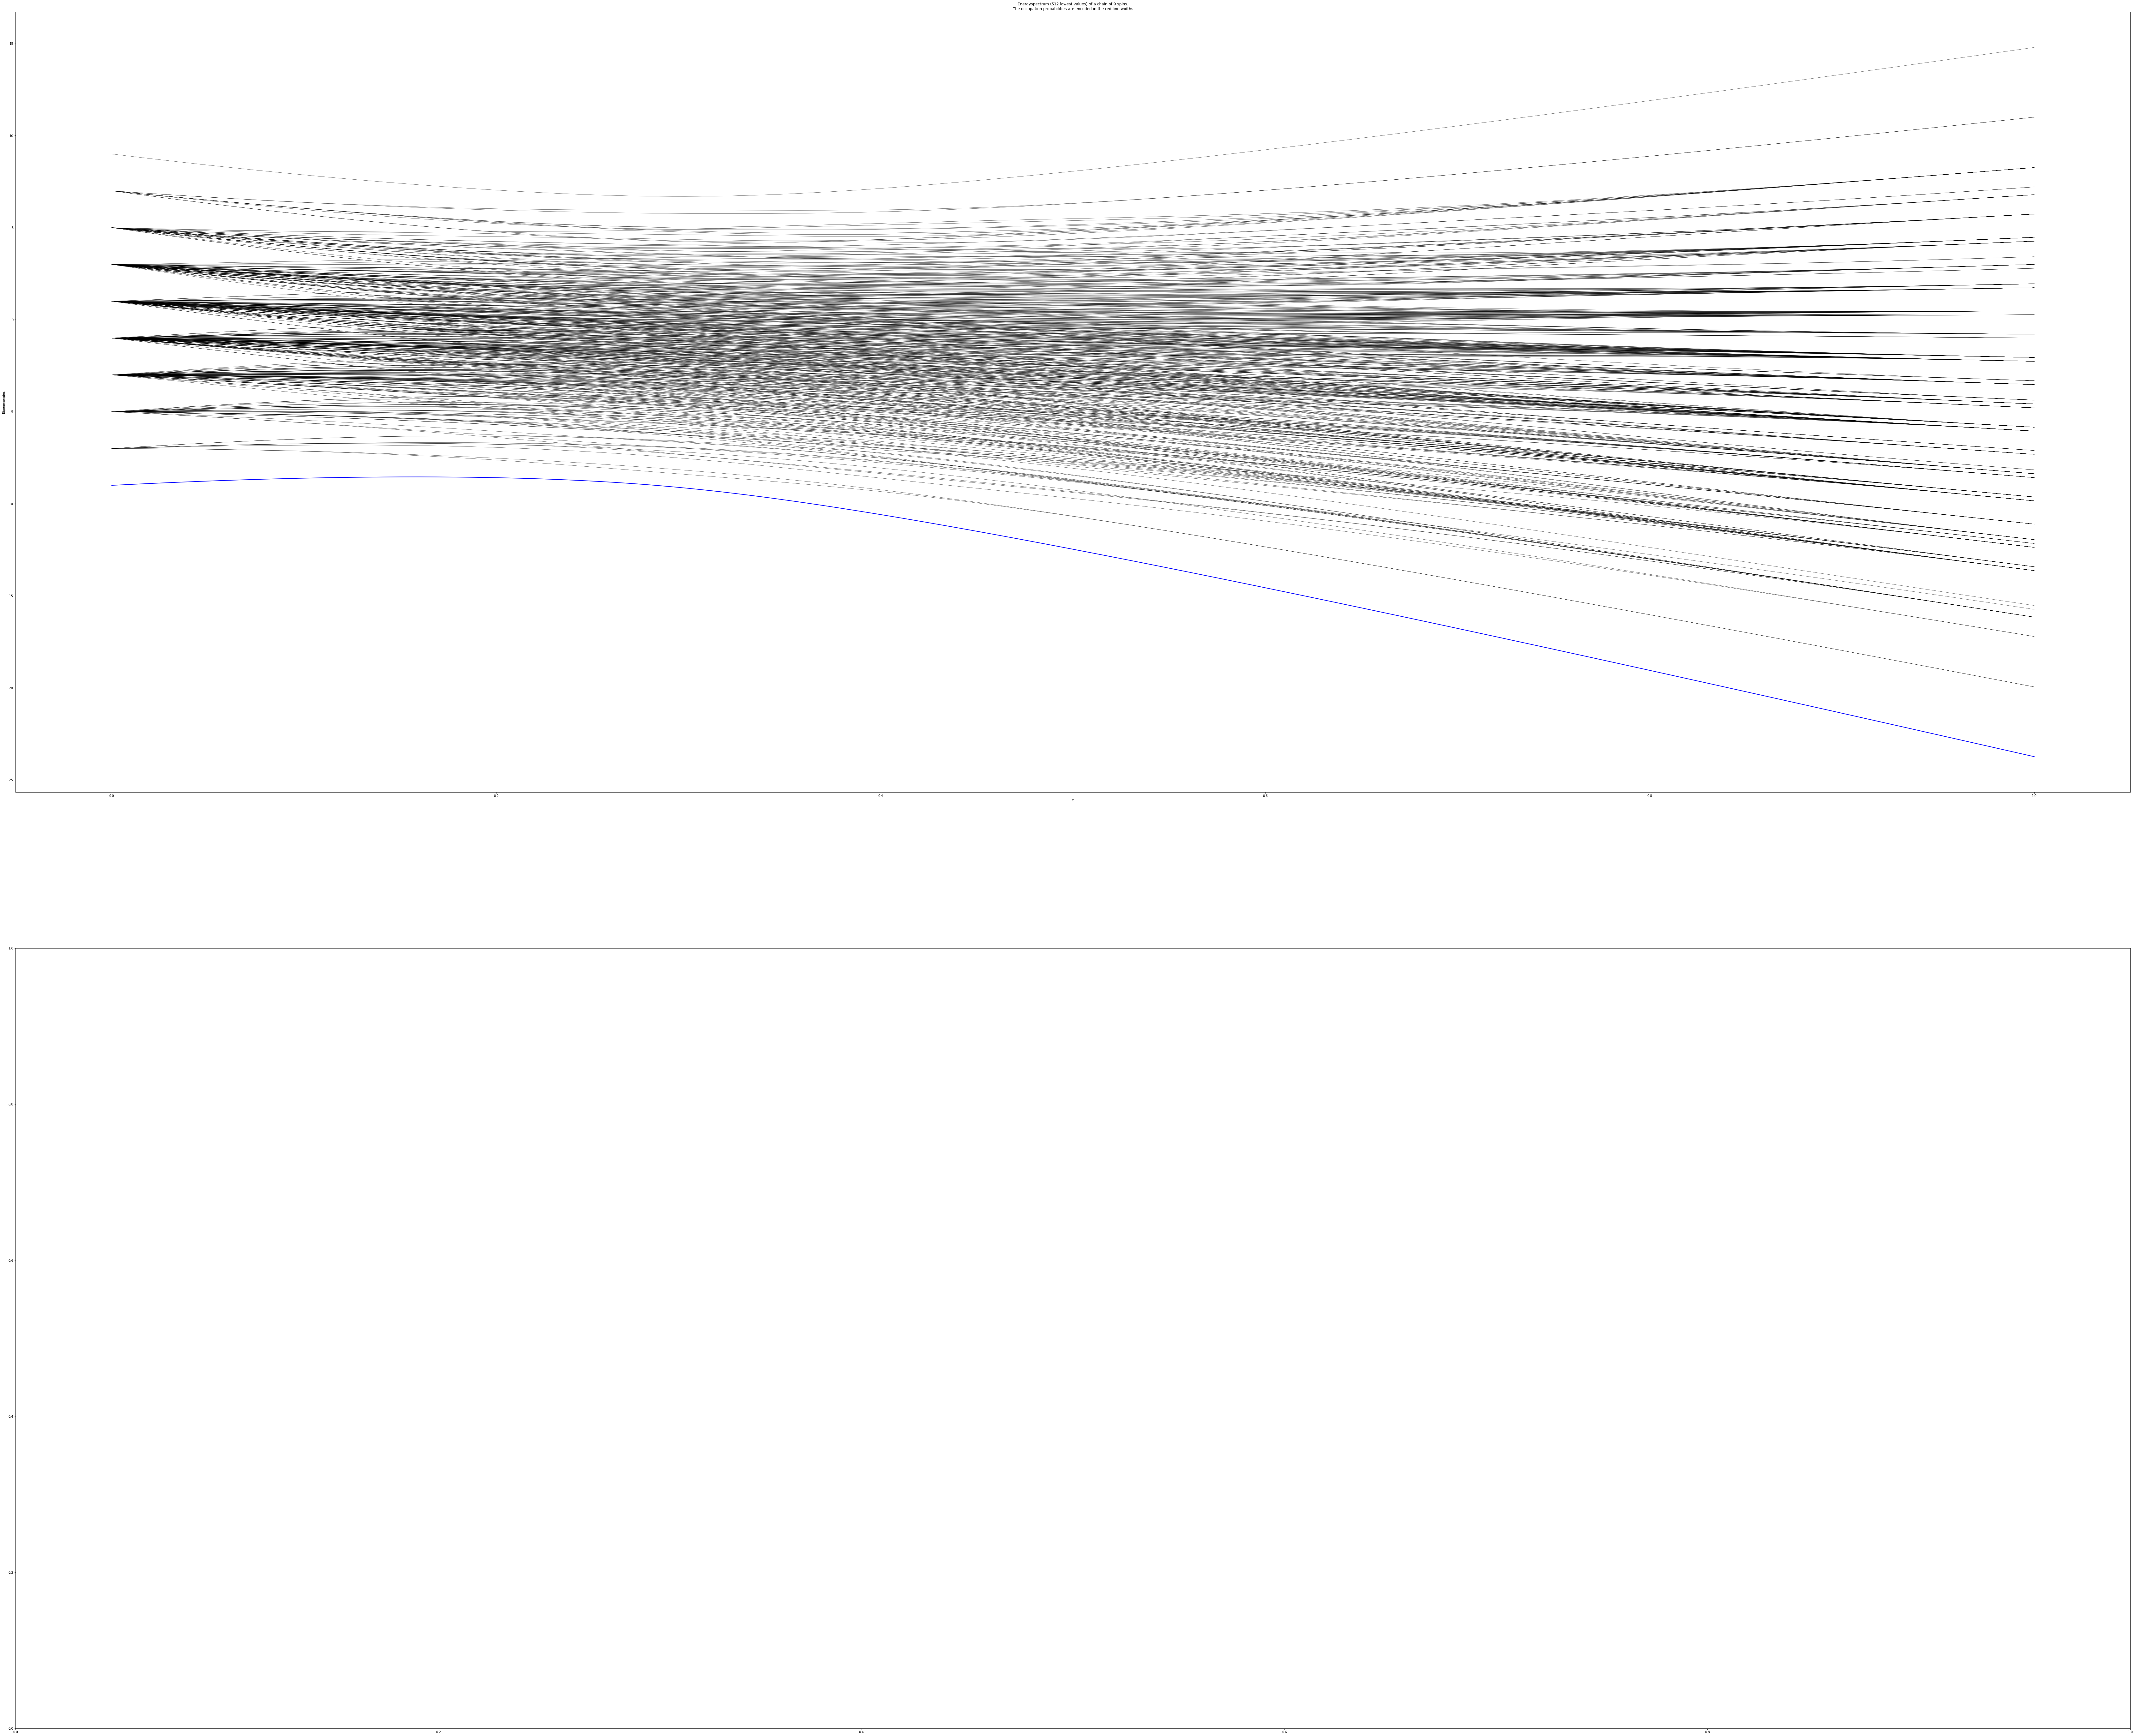

In [13]:
# f = plt.figure()
fig, axes = plt.subplots(2, 1, figsize=(120,100))

#
# plot the energy eigenvalues
#

# first draw thin lines outlining the energy spectrum
for n in range(len(evals_mat[0,:])):
    ls,lw = ('b',2) if n == 0 else ('k', 0.5)
    axes[0].plot(taulist/max(taulist), evals_mat[:,n], ls, lw=lw)

# second, draw line that encode the occupation probability of each state in 
# its linewidth. thicker line => high occupation probability.
# for idx in range(len(taulist)-1):
#     for n in range(len(P_mat[0,:])):
#         lw = 0.5 + 4*P_mat[idx,n]    
#         if lw > 0.5215:
#            axes[0].plot(array([taulist[idx], taulist[idx+1]])/taumax, 
#                         array([evals_mat[idx,n], evals_mat[idx+1,n]]), 
#                         'r', linewidth=lw)    
        
axes[0].set_xlabel(r'$\tau$')
axes[0].set_ylabel('Eigenenergies')
axes[0].set_title("Energyspectrum (%d lowest values) of a chain of %d spins.\n " % (M,N)
                + "The occupation probabilities are encoded in the red line widths.")

#
# plot the occupation probabilities for the few lowest eigenstates
#
# for n in range(len(P_mat[0,:])):
#     if n == 0:
#         axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n], 'r', linewidth=2)
#     else:
#         axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n])

# axes[1].set_xlabel(r'$\tau$')
# axes[1].set_ylabel('Occupation probability')
# axes[1].set_title("Occupation probability of the %d lowest " % M +
#                   "eigenstates for a chain of %d spins" % N)
# axes[1].legend(("Ground state",));


In [14]:
H0


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

In [15]:
psi_list

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]]]

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]]]

In [16]:
psi0.ptrace(3)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [17]:
psi0.shape

(512, 1)

(512, 1)

In [18]:
sz_list

[Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  [ 0.  0.  0. ...  0.  0. -1.]],
 Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  [ 0.  0.  0. ...  0.  0. -1.]],
 Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  

[Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  [ 0.  0.  0. ...  0.  0. -1.]],
 Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  [ 0.  0.  0. ...  0.  0. -1.]],
 Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
 Qobj data =
 [[ 1.  0.  0. ...  0.  0.  0.]
  [ 0.  1.  0. ...  0.  0.  0.]
  [ 0.  0.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -1.  0.  0.]
  [ 0.  0.  0. ...  0. -1.  0.]
  

In [19]:
print(psi0.data)


  (266, 0)	(1+0j)
  (266, 0)	(1+0j)


In [20]:
h_t

[[Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[0. 1. 1. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 1. 1. 0.]], <function __main__.<lambda>(t, args)>],
 [Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[  3.42070674   0.           0.         ...   0.           0.
      0.        ]
   [  0.           1.94713782   0.         ...   0.           0.
      0.        ]
   [  0.           0.           1.94713782 ...   0.           0.
      0.        ]
   ...
   [  0.           0.           0.         ... -11.94823316   0.
      0.        ]
   [  0.           0.           0.         ...   0.         -11.94823316
      0.        ]
   [  0.           0.           0.         ...   0.           0.
  

[[Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[0. 1. 1. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 1. 1. 0.]], <function __main__.<lambda>(t, args)>],
 [Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[  3.42070674   0.           0.         ...   0.           0.
      0.        ]
   [  0.           1.94713782   0.         ...   0.           0.
      0.        ]
   [  0.           0.           1.94713782 ...   0.           0.
      0.        ]
   ...
   [  0.           0.           0.         ... -11.94823316   0.
      0.        ]
   [  0.           0.           0.         ...   0.         -11.94823316
      0.        ]
   [  0.           0.           0.         ...   0.           0.
  

In [21]:
list(range(2,2))

[]

[]

In [22]:
basis(2,0).proj()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [23]:
ekets_mat[len(taulist)-1][0].ptrace(1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [24]:
tensor(basis(2,0),basis(2,0))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

array([ 5.19417434,  4.51135045, -5.3696137 , -1.1339393 ,  2.40186252,
       -4.63316322,  3.9513693 , -2.30465356,  4.12202468])

array([ 5.19417434,  4.51135045, -5.3696137 , -1.1339393 ,  2.40186252,
       -4.63316322,  3.9513693 , -2.30465356,  4.12202468])